In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')

# Understanding the problem
### there are two answers in this project that we need to provide
- 1st is to identify the reasons customers are leaving voluntarily
- 2nd is to create a machine learing model the would predict the probability that customers would churn 

In [122]:
# load the data set

cdf = pd.read_csv('customer.csv')

In [123]:
cdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [124]:
cdf.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [125]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [126]:
cdf.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### there are no missing numbers.

In [127]:
# checking the distrubution of values in each columns

for x in cdf.columns:
    print(cdf[x].value_counts())
    print('\n')

5879-SESNB    1
7379-POKDZ    1
5919-TMRGD    1
5828-DWPIL    1
9828-AOQLM    1
             ..
8490-BXHEO    1
9348-YVOMK    1
8663-UPDGF    1
4667-QONEA    1
6959-GQEGV    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No         

In [128]:
# first we have to convert columns with just yes and no to Zeros and ones

def tonumber(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    else:
        return None

a = ['Partner', 'PhoneService', 'Dependents', 'PaperlessBilling', 'Churn']

for x in a:
    cdf[x] = cdf[x].apply(tonumber)
    

In [159]:
# for the gender column
cdf['gender'] = cdf['gender'].apply(lambda x: 1 if x =='Male' else 0)

In [129]:
# droping the customerID column

cdf = cdf.drop('customerID', axis=1)

In [156]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(7), object(11)
memory usage: 1.1+ MB


In [144]:
# There are empty strings in the total charges column
# the approach am using is to write a python script to see the indexes they occur in and then work on them

cdf[cdf['TotalCharges']==' ']['TotalCharges'].index
checkers = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

for x in checkers:
    cdf.iloc[x, -2] = None


In [151]:
# Now we can convert the total charges column from strings to float
cdf['TotalCharges'] = cdf['TotalCharges'].astype('float64')
cdf['TotalCharges'][0]

29.85

In [153]:
cdf.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [165]:
# Next up is to covert the other categorical columns using pandas dummy variable

other = [
    'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

newdf = pd.get_dummies(cdf[other])
combined = pd.concat([cdf, newdf], axis=1).drop(labels=other, axis=1)
combined.columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines_No', 'MultipleLines_No phone service',
    'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'OnlineSecurity_No',
    'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_No internet service',
    'DeviceProtection_Yes', 'TechSupport_No',
    'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
    'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No',
    'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn'
]
combined.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


# Solving the first question

### Finding out the number of people who churn

In [6]:
cdf['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

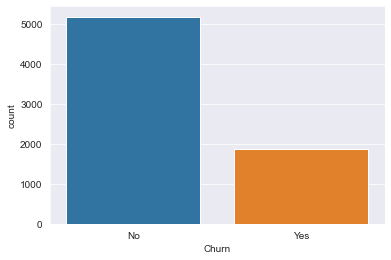

In [7]:
# count plot of the churn

sns.countplot(x= 'Churn', data=cdf)

#### churn yes means people who switched while churn no means people who didnt switch 
#### from the diagram above, the dataset tells us that most people do not switch tello companies.
#### we have to focus on the people who churned vontarily for the first question (churn = 1)

# Finding out the reasons Customers defected through Exploratory Data Analysis

In [177]:
combined.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,1,1,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


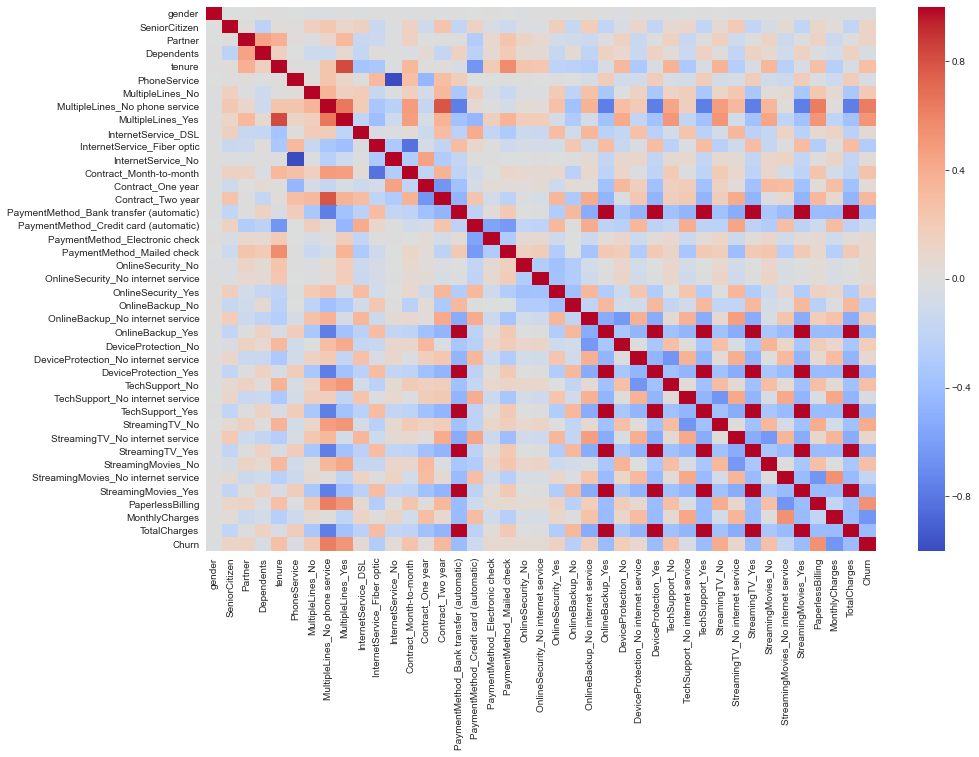

In [182]:
# plotting a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(combined.corr(), cmap='coolwarm')

([<matplotlib.axis.XTick at 0x1d1769ab7b8>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

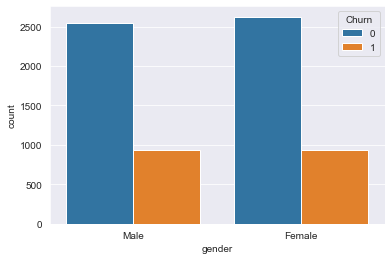

In [175]:
plt.figure()
sns.countplot(x='gender', data=cdf, hue='Churn')
plt.xticks([0,1], labels=['Male', 'Female'])

In [185]:
combined.Churn.value_counts()

0    4311
1    2732
Name: Churn, dtype: int64

The features that has a high influence on wether or not a customer would churn include
- whether or not they are senior citizens
- Streaming tv
- Streaming movies
- paperless Billing
- Monthly charges

The last 4 reasons have to do with why the customers are leaving voluntarily. we can recommend to the company that
- They should increase the quality and speed of their service towards streaming services
- the should look at reducing their rates
- they should make non paperless billings more attractive to their customers.
- they should pin the changes being made in these areas to their advert.

# Feature Selection

In [183]:
# Based on our heatmap results we can carry feature selection based on relationship with the churn decision 

combined.corr()['Churn']

gender                                    -0.010487
SeniorCitizen                              0.120176
Partner                                    0.117412
Dependents                                -0.039741
tenure                                     0.286111
PhoneService                              -0.032959
MultipleLines_No                           0.211716
MultipleLines_No phone service             0.627429
MultipleLines_Yes                          0.519867
InternetService_DSL                        0.061382
InternetService_Fiber optic               -0.275256
InternetService_No                         0.032959
Contract_Month-to-month                    0.258751
Contract_One year                          0.025698
Contract_Two year                          0.322923
PaymentMethod_Bank transfer (automatic)   -0.418675
PaymentMethod_Credit card (automatic)     -0.116633
PaymentMethod_Electronic check             0.064926
PaymentMethod_Mailed check                 0.073960
OnlineSecuri

In [ ]:
drop = ['gender', 'Dependents']

## Extracting only the customers who churned from the original dataset

In [186]:
churned = combined[combined['Churn']==1]
churned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
5,0,0,0,0,8,1,1,99.65,820.50,1,...,1,1,0,0,0,0,1,0,0,1
8,0,0,1,0,28,1,1,104.80,3046.05,1,...,1,0,0,1,0,0,1,0,0,1
12,1,0,1,0,58,1,0,100.35,5681.10,0,...,1,1,0,0,0,0,1,0,0,1
13,1,0,0,0,49,1,1,103.70,5036.30,1,...,1,1,0,0,0,0,1,0,0,1
14,1,0,0,0,25,1,1,105.50,2686.05,0,...,1,0,0,1,0,0,1,0,0,1


## Working on the 'Churned' Dataframe

In [ ]:
# compare the features to the churn value
# gender countplot

sns.barplot(x='gender', y='Churn', data=churned, estimator=sum)

In [ ]:
churned['gender'].value_counts()

#### We can say that gender doesn't have any effect on customer defection

In [ ]:
# internet countplot

sns.countplot(x='InternetService', data=churned, hue = 'Churn')

In [ ]:
cdf.info()

In [ ]:
#cdf.drop(['customerID', 'gender', 'Male', ])

# sorting the complicated columns

In [50]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
from sklearn.dummy import DummyClassifier

ccolumns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

classife

